In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

# PERFORM THE DATA CLEANING AND EDA ON TITANIC DATASET

# IDENTIFY PATTERNS AND RELATIONSHIPS BETWEEN FEATURES

## EXPLORING DATA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Dimensions of data set

In [4]:
df.shape

# This dataset has 891 rows and 12 columns

(891, 12)

# INFORMATION AND DATA TYPE SUMMARY

In [5]:
df.info()


# INSIGHTS

# 1. There are 5 categorical variables including the target
# 2. Ther are 7 numerical variables and two of them in float format
# 3. Age and Cabin has null values which need to be handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# CREATING A NEW DATAFRAME WITH DATATYPE, UNIQUE AND NULL VALUES
datasum = pd.DataFrame(df.dtypes)
datasum

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
# Creating a column of null values

datasum['NullValues'] = df.isnull().sum()
datasum

,0,NullValues
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [8]:
# Identify number of unique values, For object nunique will identify the number of levels
# Add the stats the dataframe
datasum['NUnique']=df.nunique()
datasum

,0,NullValues,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [9]:
# Identify the count for each variable, add the stats to datadict
datasum['Count']=df.count()
datasum

,0,NullValues,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [10]:
datasum = datasum.rename(columns = {0: 'Data Type'})
datasum

,Data Type,NullValues,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [11]:
# INSIGHTS

# 1. Null values are in Age and Cabin column
# 2. There are 891 unique rows so ideally none of them can be deleted as they are unique 
# 3. Two target classes - Survived and Dead
# 4. Age has 88 unique numbers


# MORE NULL VALUES ANALYSIS

In [12]:
#  Percentage of null values 
    
Percent = round(df.isnull().sum()*100/len(df), 2)
Percent

# 77% of the cabin information is null or missing values
# Age also has 20% missing values
# Embarked has less than 1% missing values


# We can impute the mean values of Age and Cabin with mean values of the columns

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

# DATA DUPLICATION

In [13]:
df.duplicated().sum()

# The unique column in the datasum already explains that there are no duplicates as we have 891 rows and 891 unique 
# passengers

0

# DESCRIPTIVE STATISTICS ON NUMERICAL AND CATEGORICAL DATA TYPES

In [14]:
# FOR CATEGORICAL DATA
df.describe(include = ['object'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
# FOR NUMERICAL DATA
df.describe().T

# There are three passenger classes
# Average age of passengers is 29
# Average Fare is 32


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


# UNIVARIATE AND MULTIVARIATE ANALYSIS

In [16]:
## TARGET VARIABLE COUNTS

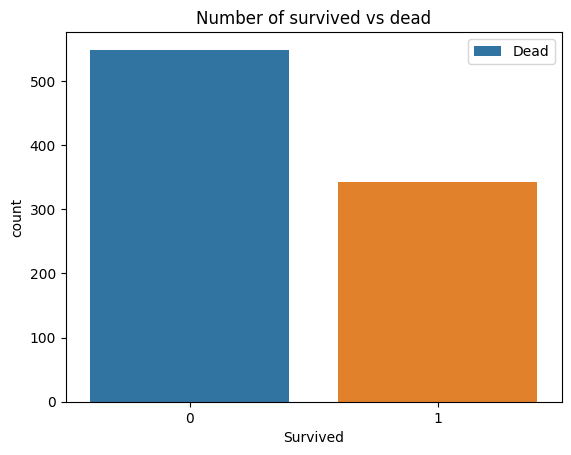

In [17]:
labels = ['Dead', 'Survived']


sns.countplot(x = 'Survived',data = df)
plt.title("Number of survived vs dead")
plt.legend(labels)
plt.show()

# 549 people died on the titanic and only 342 survived

In [18]:
# Percentage of Survived

df.Survived.sum()*100/df.Survived.count()


# Only 38% of the people who travelled survived on the ship

38.38383838383838

<Axes: xlabel='Survived', ylabel='count'>

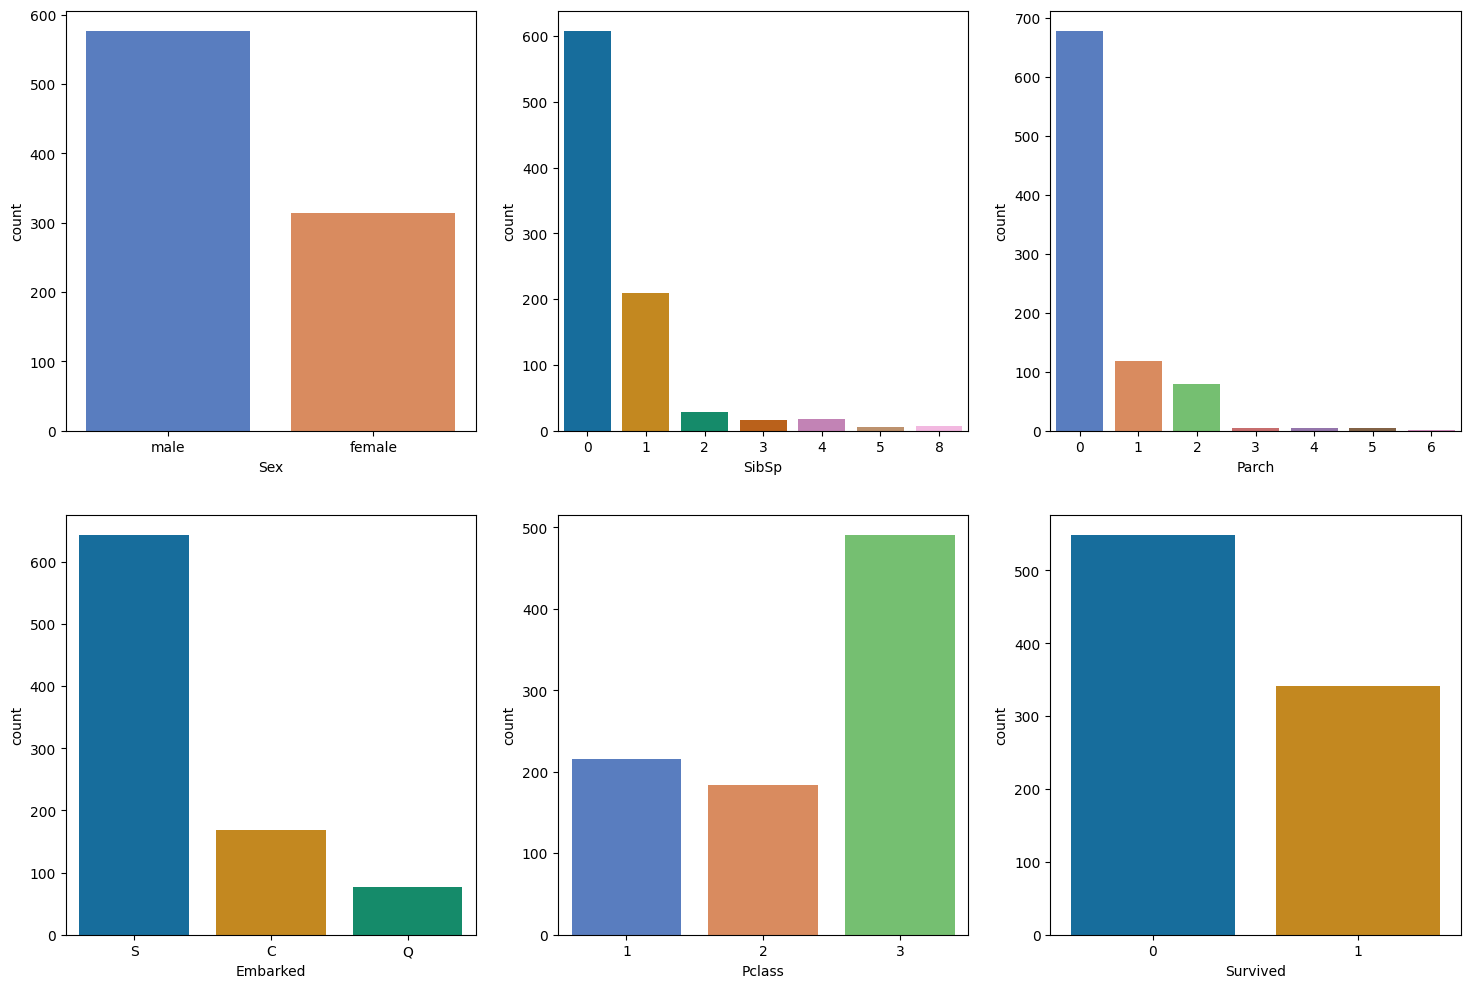

In [19]:


fig, axes = plt.subplots(2,3, figsize = (18,12))
sns.countplot(x ='Sex', data = df, ax = axes[0,0], palette = 'muted')
sns.countplot(x ='SibSp', data = df, ax = axes[0,1], palette = 'colorblind')
sns.countplot(x = 'Parch', data = df, ax = axes[0,2], palette = 'muted')
sns.countplot(x= 'Embarked', data = df, ax = axes[1,0], palette = 'colorblind')
sns.countplot(x = 'Pclass', data = df, ax =axes[1,1], palette = 'muted')
sns.countplot(x = 'Survived', data = df, ax =axes[1,2], palette = 'colorblind')

In [20]:
# INSIGHTS

# 1. There are 577 male passengers than female AND 314 female passengers
# 2. The number of passengers with one sibling or spouse are 209 and rest of them are less than 30
# 3. The number of passengers with Parents or children are 118
# 4. Majority of passengers started from Southampton abput 644 passengers, very few embarked from Queenstown or Cherborg
# 5. There were three passenger classes and majority belonged to class 3
# 6. In terms of survived and dead 549 died and only 342 survived

In [21]:
# GETTING VALUE COUNTS FOR THE ABOVE GRAPHS

In [22]:
columns = ['Sex','SibSp','Parch','Embarked', 'Pclass','Survived' ]

for col in columns:
    valuecount = df[col].value_counts()
    print(f'The value counts for {col} is {valuecount}')

The value counts for Sex is male      577
female    314
Name: Sex, dtype: int64
The value counts for SibSp is 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
The value counts for Parch is 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
The value counts for Embarked is S    644
C    168
Q     77
Name: Embarked, dtype: int64
The value counts for Pclass is 3    491
1    216
2    184
Name: Pclass, dtype: int64
The value counts for Survived is 0    549
1    342
Name: Survived, dtype: int64


# BIVARIATE ANALYSIS

In [23]:
# Gender and Survived comparison

df.groupby(['Survived', 'Sex'])['Survived'].count().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


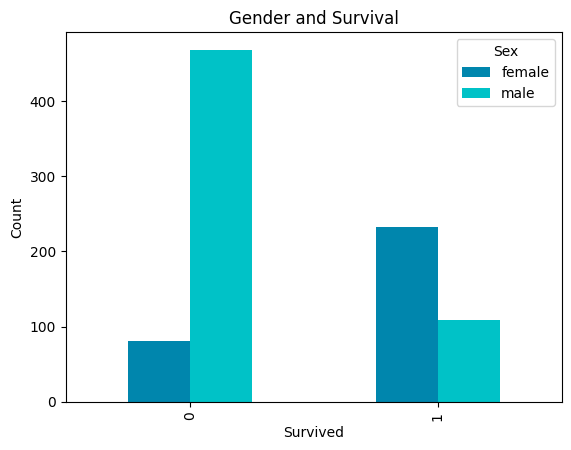

In [24]:


df.groupby(['Survived', 'Sex'])['Survived'].count().unstack().plot(kind = 'bar', color = ['#0086ad','#00c2c7'])
plt.title('Gender and Survival')
plt.ylabel("Count")
plt.show()

# Insights

# 1. This data shows that more males were dead than females possibly because females and children were
# given priority
# 2. In the survived category, we can see more females survived. 
# 3. 468 male passengers died while only 81 female passengers died
# 4. Double the number of female passengers survived when compared to male passengers

In [25]:
# Passenger class and Survived comparison

In [26]:
df.groupby(['Survived', 'Pclass'])['Survived'].count().unstack()

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


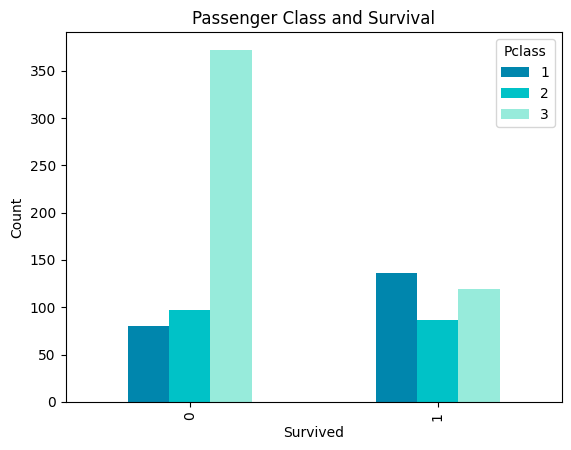

In [27]:
df.groupby(['Survived', 'Pclass'])['Survived'].count().unstack().plot(kind = 'bar', color = ['#0086ad','#00c2c7', '#97ebdb'])
plt.title('Passenger Class and Survival')
plt.ylabel("Count")
plt.show()

# INSIGHTS

# 1. Class 3 passengers died the most indicated possibly very low fare tickets
# 2. Class 1 passengers dies the least 
# 3. The number of passengers who survived and died in class 2 are similar

In [28]:
# Siblings, Spouse and Survived comparison

In [29]:
df.groupby(['Survived', 'SibSp'])['Survived'].count().unstack()

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


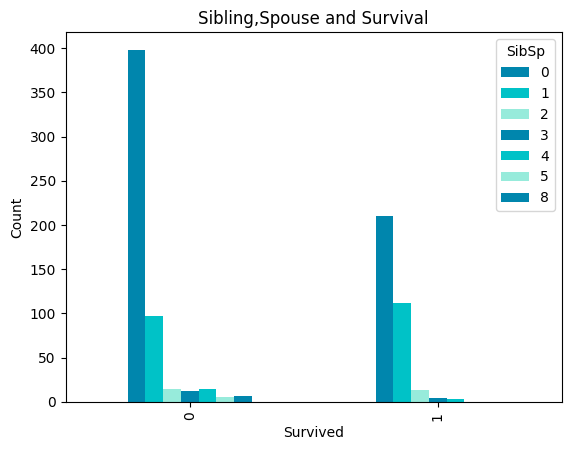

In [30]:
df.groupby(['Survived', 'SibSp'])['Survived'].count().unstack().plot(kind = 'bar', color = ['#0086ad','#00c2c7', '#97ebdb'])
plt.title('Sibling,Spouse and Survival')
plt.ylabel("Count")
plt.show()

# Insights

# 1. Most number of people who died had only one sibling or spouse 
# 2. Similarly most of them who survived also had one sibling or spouse

In [31]:
# Parents, Children and Survived comparison

In [32]:
df.groupby(['Survived', 'Parch'])['Survived'].count().unstack()

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


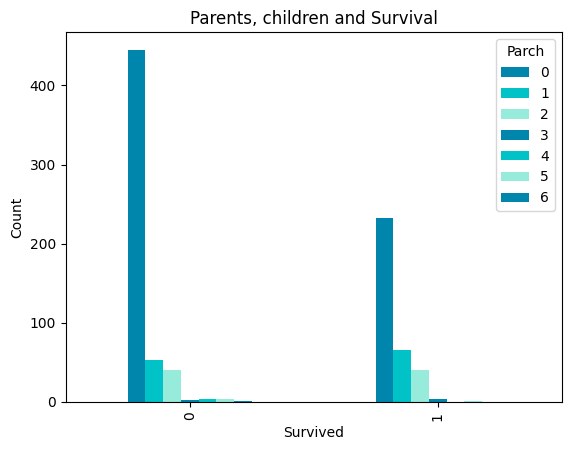

In [33]:
df.groupby(['Survived', 'Parch'])['Survived'].count().unstack().plot(kind = 'bar', color = ['#0086ad','#00c2c7', '#97ebdb'])
plt.title('Parents, children and Survival')
plt.ylabel("Count")
plt.show()

# INSIGHTS

# 1. Majority of passengers who survived or died had only no parents or childern 
# 2. Folowed by 1 or 2 parents or children

In [34]:
# Embarked and Survived comparison

df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack()

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


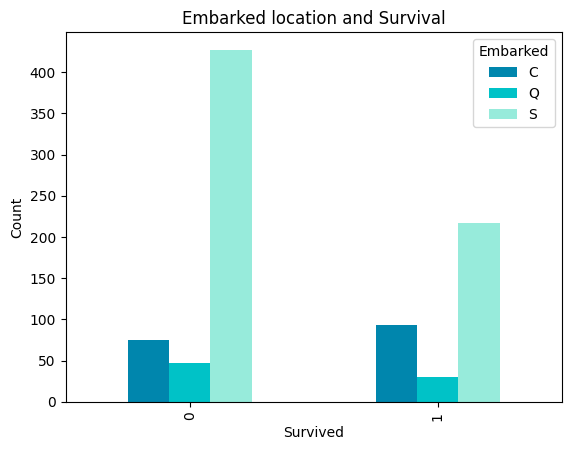

In [35]:
df.groupby(['Survived', 'Embarked'])['Survived'].count().unstack().plot(kind = 'bar', color = ['#0086ad','#00c2c7', '#97ebdb'])
plt.title('Embarked location and Survival')
plt.ylabel("Count")
plt.show()

# INSIGHTS

# Since majority of passengers boarded at Southampton,  majority of them who died or survived were 
# those wgo embarked from southampton as well followed by Cherbourg

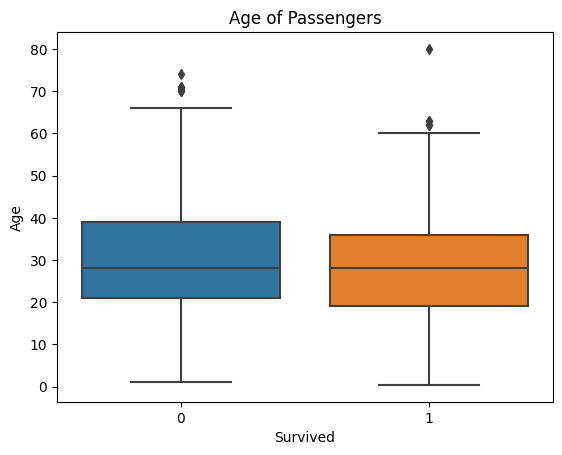

In [36]:
# AGE AND SURVIVED

sns.boxplot(x = 'Survived', y = 'Age', data = df)
plt.title('Age of Passengers')
plt.show()


# INSIGHTS

# 1. Mean age of passengers who died and survived are the same
# 2. The oldest passenger survived 


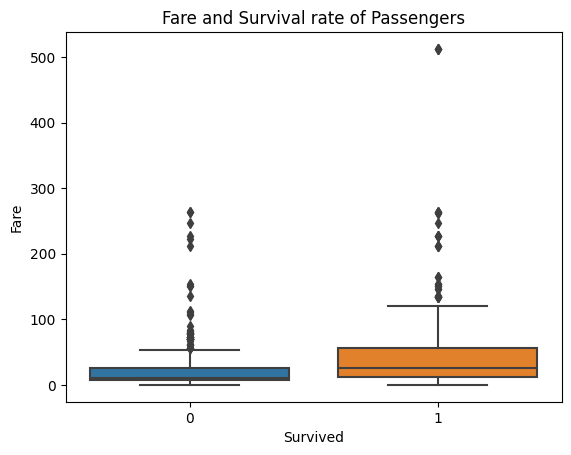

In [37]:
# FARE AND SURVIVED

sns.boxplot(x = 'Survived', y = 'Fare', data = df)
plt.title('Fare and Survival rate of Passengers')
plt.show()


# INSIGHTS

# The average fare paid by passengers who didnt survive is lower than the ones survived


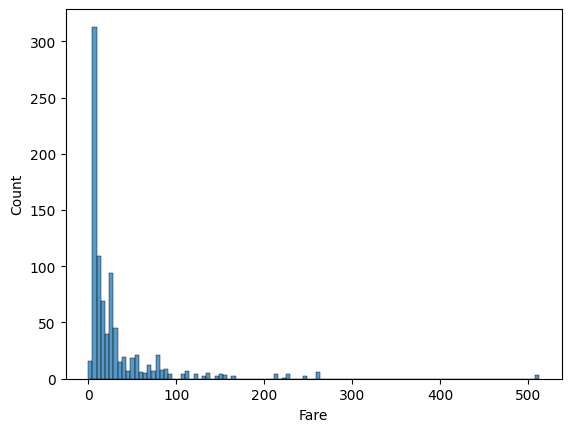

In [38]:
sns.histplot(df['Fare'])
plt.show()

# Majority of passengers have paid fare less than 50


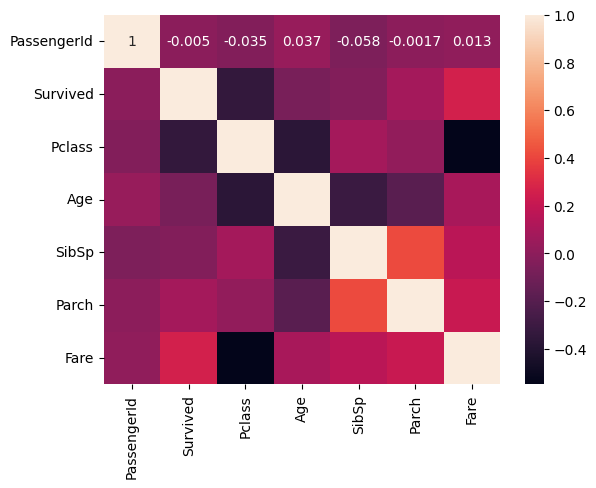

In [39]:
# CORRELATION BETWEEN THE FEATURES

sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

In [42]:
# Fare is the only numeric class that has a good correlation with survived
# Parents and children feature also has a weak positive correlation

/var/folders/8h/67zlqswd6nsfxgp6gvbcx7gc0000gn/T/ipykernel_15526/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000
